<div style="background-color:#87CEEB; padding:20px; font-family: 'Garamond', serif;">
    <h1 style="color:#FFFFFF; font-family: 'Garamond', serif;"><strong>Data Analysis on the Relationship of Autism with Facial Expressions in Children</strong></h1>
<div style="background-color:#ADD8E6; padding:10px; font-family: 'Garamond', serif; text-align: center;">
    <img src="https://imgur.com/c4LYfJG.png" alt="Header Image" style="width:20%; margin: 0 auto;">
</div>
        <h2 style="color:#FFFFFF; font-family: 'Garamond', serif;">Introduction</h2>
        <p>In this notebook, we will explore the relationship between autism and facial expressions in children. We will analyze a dataset containing facial images of autistic and non-autistic children.</p>
    <div style="background-color:#ADD8E6; padding:10px; font-family: 'Garamond', serif;">
        <h2 style="color:#FFFFFF; font-family: 'Garamond', serif;">Objectives</h2>
        <ul>
            <li>Investigate how facial expressions relate to autism in children.</li>
            <li>Perform visual and statistical analysis to better understand the data.</li>
            <li>Explore the possibility of using facial recognition for early autism detection.</li>
        </ul>
    </div>
    <div style="background-color:#ADD8E6; padding:10px; font-family: 'Garamond', serif;">
        <h2 style="color:#FFFFFF; font-family: 'Garamond', serif;">Dataset</h2>
        <p>The dataset used contains facial images of children labeled as autistic and non-autistic. It was compiled for the purpose of researching the relationship between facial expressions and autism.</p>
    </div>
    <div style="background-color:#ADD8E6; padding:10px; font-family: 'Garamond', serif;">
        <h2 style="color:#FFFFFF; font-family: 'Garamond', serif;">Notebook Structure</h2>
        <ol>
            <li><strong>Data loading and exploration</strong>
                <ul>
                    <li>Import libraries</li>
                    <li>Loading data.</li>
                    <li>Visualizing some samples.</li>
                </ul>
            </li>
            <li><strong>Exploratory data analysis</strong>
                <ul>
                    <li>Descriptive statistics.</li>
                </ul>
            </li>
            <li><strong>Modeling and autism detection</strong>
                <ul>
                    <li>Image preprocessing.</li>
                    <li>Training facial recognition models.</li>
                    <li>Evaluating autism detection capability.</li>
                </ul>
            </li>
        </ol>
    </div>
</div>


<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h2 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Data Loading and Exploration</h2>

<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
<h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Import Libraries</h4>

First we are going to import the different libraries that will conform our project and will help us at the time of the creation of our neural network.

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
from keras.layers import Input
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import sys
from keras import optimizers, metrics, callbacks




2024-05-12 20:57:32.919105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 20:57:32.919206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 20:57:33.056500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
<h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Loading Data</h4>

In this notebook, our objective is to load the dataset containing images of both autistic and non-autistic children. This dataset is organized into three distinct folders: `train`, `valid`, and `test`, each containing a portion of the dataset. 

Rather than keeping the data separated in these folders, we will consolidate them into a single dataset. However, before combining the data, we will perform a shuffle of the images within each folder individually. This initial step ensures randomness in our dataset, which is crucial for effective training and evaluation of machine learning models.


In [2]:
train = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        full_path = os.path.join(dirname, filename)
        archive=os.path.join(dirname, filename)
        img=cv2.imread(archive)
        if img is not None:
            img = cv2.resize(img, (200, 200)) 
            relative_path = os.path.relpath(full_path, '/kaggle/input/autism-facial-image-dataset/Facial images dataset for Autism Detection/')
            train.append([img,relative_path,archive])
        else:
            print(f'Failed Load Image:{archive}')

In [3]:
train_data = []
valid_data = []
test_data = []
for item in train:
    full_path = item[0]
    label = item[1].split('/')[1]
    path=item[2]
    is_auth=0 if label == 'autistic' else 1
    train_data.append([full_path, label,path,is_auth])
np.random.shuffle(train_data)
print(f'There are {len(train_data)} images')

There are 2926 images


<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Data Visualization</h4>

Let's create a sample visualization using randomly generated data obtained earlier. We'll utilize Matplotlib to plot this data, showcasing its versatility and ease of use. Through this visualization, we can explore patterns, trends, or distributions within the list, demonstrating the power of data visualization in understanding and communicating insights.

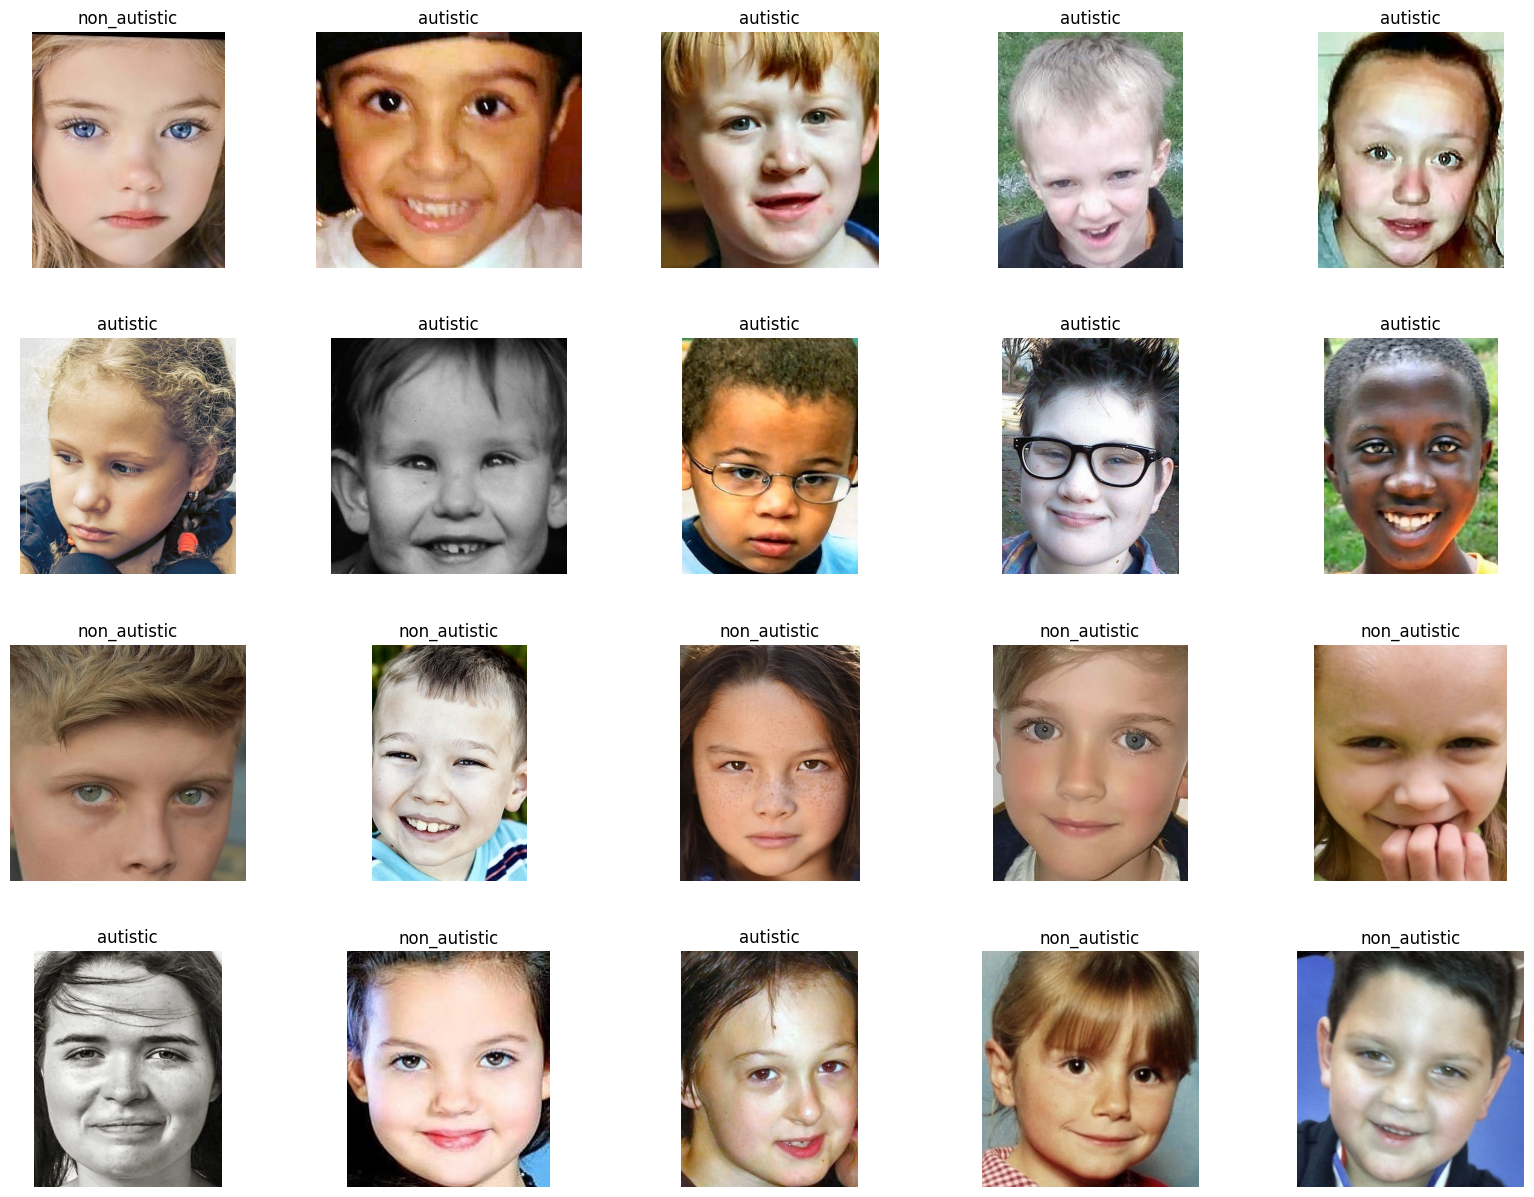

In [4]:
def show_images(data):
    num_images = min(len(data), 20)
    fig, axes = plt.subplots(4, 5, figsize=(20, 15)) 
    for i in range(num_images):
        img_path = data[i][2]
        label = data[i][1]
        img = mpimg.imread(img_path)
        row = i // 5
        col = i % 5   
        axes[row, col].imshow(img)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.show()

show_images(train_data)

<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h2 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Exploratory data analysis</h2>


<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Descriptive Stadistics</h4>

Upon examining the obtained list,we'll conduct an assessment to determine the count of children with and without autism.
This analysis will provide insights into the distribution of autism diagnosis within the list.


### Description of the partitions:
- This provides a summary of the 'Autism' column, including count, unique values, the most frequent value, and frequency of the most frequent value.

### Value counts for each partition:
- This shows the count of each unique value in the 'Autism' column, providing insight into the distribution of data among different partitions.


Description of Partitions:
count             2926
unique               2
top       non_autistic
freq              1463
Name: Autism, dtype: object

Value Counts in Each Partition:
Autism
non_autistic    1463
autistic        1463
Name: count, dtype: int64


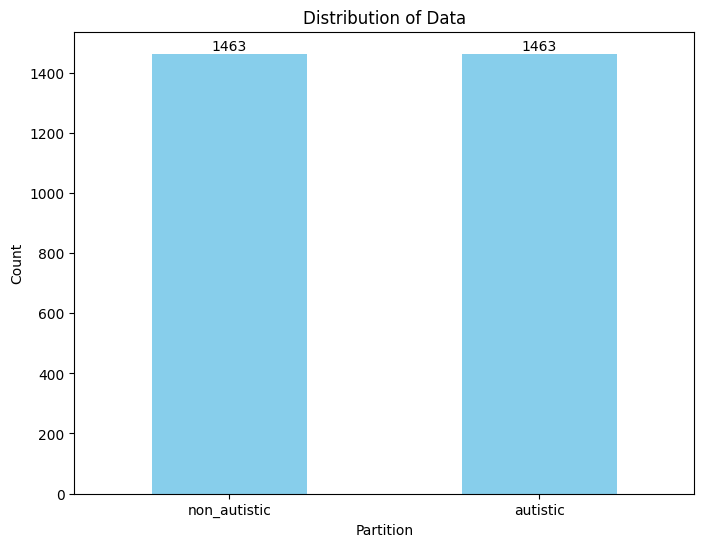

In [5]:
df = pd.DataFrame(train_data, columns=['Location', 'Autism','TotalLocation','Autism_Count'])
print("\nDescription of Partitions:")
print(df['Autism'].describe())
print("\nValue Counts in Each Partition:")
print(df['Autism'].value_counts())
plt.figure(figsize=(8, 6))
ax = df['Autism'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Data')
plt.xlabel('Partition')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(df['Autism'].value_counts()):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.show()

We have been able to verify in the previous deductions that there are an equal number of cases for autism and non-autism. It was also determined that there are only these 2 data points for autism and non-autism.


<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h2 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Modeling and autism detection</h2>

<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Image Preproccesing</h4>

We divide the values generated previously in valid test and train randomly, for this we must select a sample proportional to the amount of data we have.

In [6]:
y=[]
x=[]
np.random.shuffle(train_data)
for i in range(len(train_data)):
    x.append(train_data[i][0])
    y.append(train_data[i][3])

y=np.array(y)
x=np.array(x)
x_train_full,x_test, y_train_full, y_test= train_test_split(x,y,test_size=0.2)
print(f'Y has {y_train_full.shape[0]} values and X has {x_train_full.shape[0]} values')
X_valid, X_train = x_train_full[:250] / 255., x_train_full[250:] / 255.
y_valid, y_train = y_train_full[:250], y_train_full[250:]
X_test = x_test / 255.

Y has 2340 values and X has 2340 values


In [7]:
x_train_full.shape, y_test.shape


((2340, 200, 200, 3), (586,))

<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Training facial recognition models</h4>

Now we are going to make the declaration of the model that we are going to use. It will consist of:

**Definition of input and output dimensions:**
- `input_dimension`: Defines the input dimensions of the model, excluding the channel dimension.
- `dimension_output`: Defines the output dimension of the model, in this case, 1 for binary classification.

**Sequential Model Definition:**
- Sequential Keras model, a linear stack of layers.

**Adding Layers to the Model:**
- Convolutional and MaxPooling layers for feature extraction from images.
- Densely connected layers for final classification.
- Output layer with sigmoid activation for binary classification probability.

**Model Summary:**
- Prints the architecture of the model and the number of trainable parameters.

**Model Compilation:**
- Uses the Adam optimizer with a specified learning rate.
- Uses binary crossentropy loss function for binary classification problems.
- Defines metrics such as accuracy, precision, and recall to evaluate model performance during training.


In [8]:
dimension_entrada = x_train_full.shape[1:4]
dimension_salida = 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=dimension_entrada))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation="relu"))
# model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(64, activation="relu"))  
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()
opt = optimizers.Adam(learning_rate=0.00001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,711,169 (14.16 MB)

 Trainable params: 3,709,185 (14.15 MB)

 Non-trainable params: 1,984 (7.75 KB)

We will now start with the previously launched model:

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/9223372036854775807


2024-05-12 20:58:28.711232: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65: 5.41783, expected 4.72242
2024-05-12 20:58:28.711286: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 66: 4.33458, expected 3.63917
2024-05-12 20:58:28.711296: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 141: 5.05684, expected 4.36143
2024-05-12 20:58:28.711304: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 142: 5.83136, expected 5.13595
2024-05-12 20:58:28.711312: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 143: 5.29561, expected 4.6002
2024-05-12 20:58:28.711320: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 216: 5.34702, expected 4.65161
2024-05-12 20:58:28.711328: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 264: 5.29538, expected 4.59997
2024-05-12 20:58:28.711336: E external/local

 5/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5469 - loss: 1.5669

I0000 00:00:1715547517.678552      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5111 - loss: 1.5027

2024-05-12 20:58:42.275288: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39270: 4.54897, expected 3.8847
2024-05-12 20:58:42.275350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39271: 5.56504, expected 4.90076
2024-05-12 20:58:42.275360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39346: 5.13362, expected 4.46934
2024-05-12 20:58:42.275368: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39347: 5.39993, expected 4.73565
2024-05-12 20:58:42.275376: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39468: 4.65743, expected 3.99315
2024-05-12 20:58:42.275384: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39544: 4.67595, expected 4.01167
2024-05-12 20:58:42.275392: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39545: 4.23047, expected 3.56619
2024-05-12 20:58:42.275399: 

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5111 - loss: 1.5006

2024-05-12 20:58:50.279918: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 117678: 3.90812, expected 3.37558
2024-05-12 20:58:50.279974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 117715: 4.24471, expected 3.71217
2024-05-12 20:58:50.279984: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 117754: 4.16554, expected 3.633
2024-05-12 20:58:50.279993: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 117827: 4.20254, expected 3.67
2024-05-12 20:58:50.280001: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 117952: 3.1382, expected 2.60566
2024-05-12 20:58:50.280010: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 118150: 3.74092, expected 3.20838
2024-05-12 20:58:50.280019: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 118418: 4.2852, expected 3.75266
2024-05-12 20:58:50.280028:

66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 222ms/step - accuracy: 0.5110 - loss: 1.4984 - val_accuracy: 0.4920 - val_loss: 0.7064
Epoch 2/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5459 - loss: 1.0437 - val_accuracy: 0.4920 - val_loss: 0.7725
Epoch 3/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5715 - loss: 0.9336 - val_accuracy: 0.4920 - val_loss: 0.8777
Epoch 4/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5984 - loss: 0.8723 - val_accuracy: 0.4920 - val_loss: 0.9035
Epoch 5/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6106 - loss: 0.7461 - val_accuracy: 0.5000 - val_loss: 0.8355
Epoch 6/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6096 - loss: 0.7323 - val_accuracy: 0.5360 - val_loss: 0.7367
Epoch 7/9223372036854775807
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6408 - loss: 0.7024 - val_accuracy: 0.5760 - val_loss: 0.6610
Epoch 8/9223372036

We can observe the different values that take the orders assigned by us in the following graph, we can observe that the val loss and val take similar trends as well as accuracy and val accuracy.

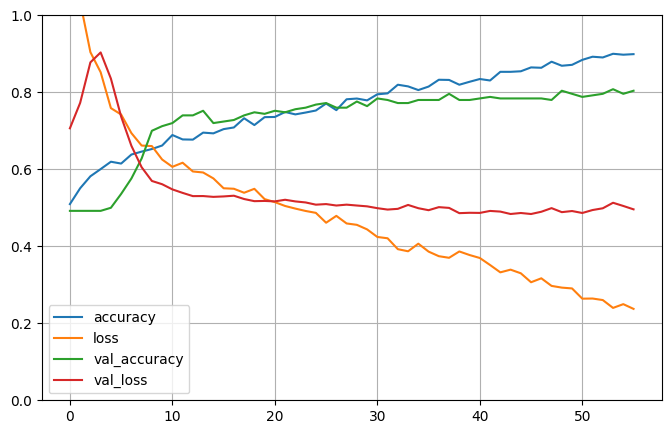

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<div style="background-color:#87CEEB; padding:20px; font-family: Arial, sans-serif;">
    <h4 style="color:#FFFFFF; font-family: 'Times New Roman', Times, serif;">Evaluating autism detection capability</h4>

Finally, we will evaluate the model once the training is finished.

In [11]:
evaluation=model.evaluate(X_test, y_test)
accuracy = evaluation[1]
val_loss = evaluation[0]
# val_accuracy = evaluation[3]
print("Accuracy:", accuracy)
print("Validation Loss:", val_loss)
# print("Validation Accuracy:", val_accuracy)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7989 - loss: 0.4438
Accuracy: 0.7918089032173157
Validation Loss: 0.4540463089942932


Here we can see in a confusion matrix the data that have been correct in the diagonal and in the inverse diagonal the data that have been wrongly assigned by the model.

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


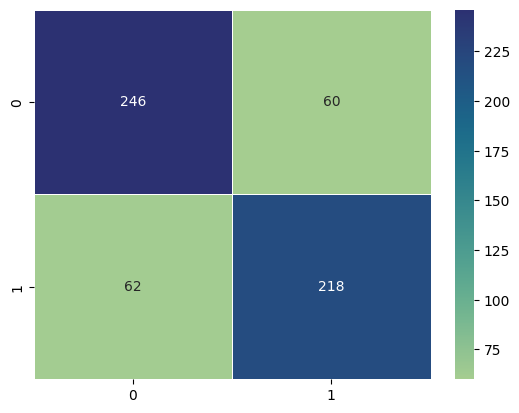

In [12]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = y_test_pred > 0.5
y_test_true_labels = y_test
cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',cmap="crest",linewidths=.5)
plt.show()

The `classification_report` function generates a detailed report that includes various metrics to evaluate the performance of a classification model. It compares the true labels (`y_test_true_labels`) with the predicted labels (`y_test_pred_labels`) and computes metrics such as precision, recall, F1-score, and support for each class. These metrics provide insights into how well the model is performing for each class in the classification problem.

In [13]:
report = classification_report(y_test_true_labels, y_test_pred_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7987    0.8039    0.8013       306
           1     0.7842    0.7786    0.7814       280

    accuracy                         0.7918       586
   macro avg     0.7914    0.7912    0.7913       586
weighted avg     0.7918    0.7918    0.7918       586



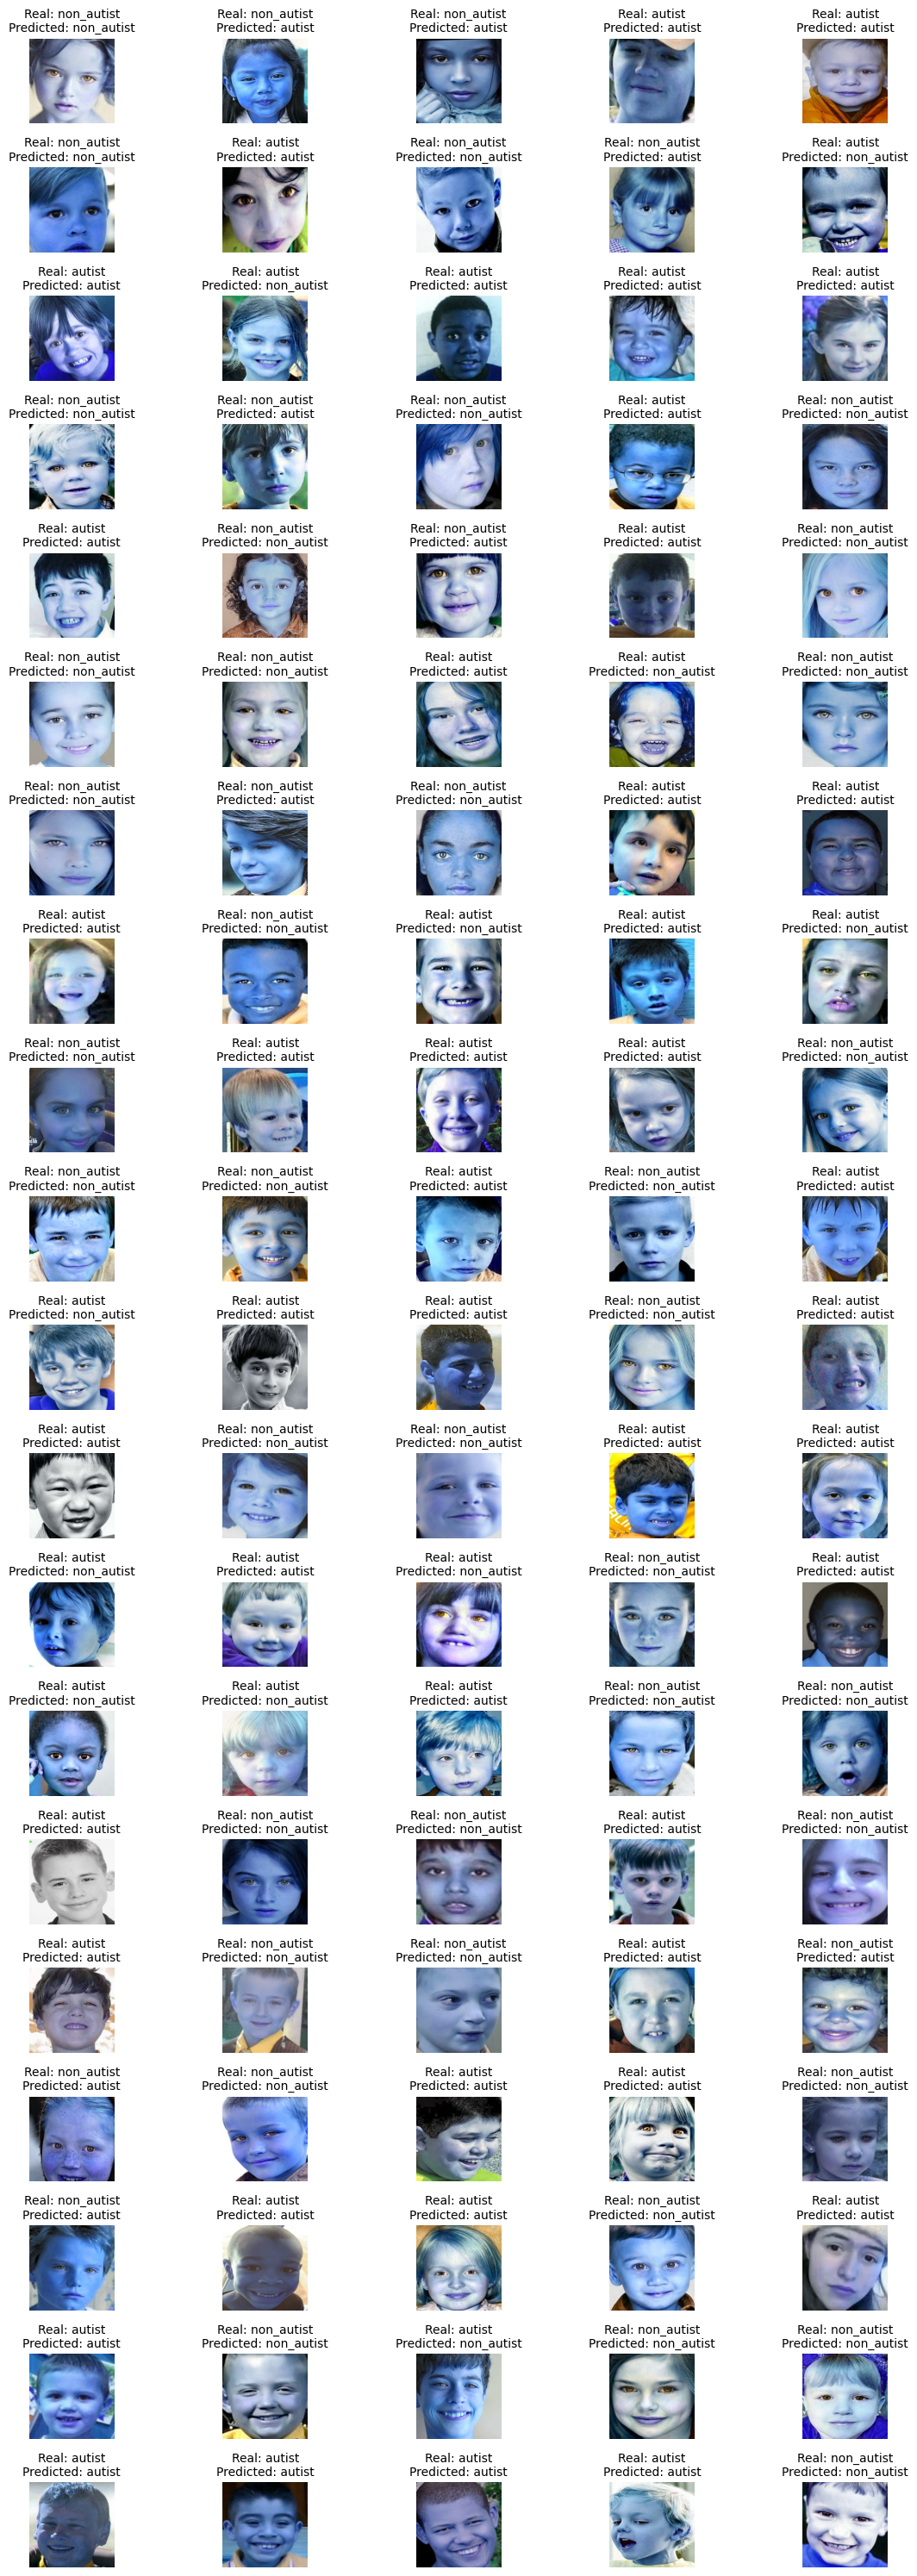

In [14]:
import matplotlib.pyplot as plt

def plot_image_with_labels(image, true_label, pred_label, ax):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Real: {true_label}\nPredicted: {pred_label}', fontsize=10)

fig, axs = plt.subplots(nrows=20, ncols=5, figsize=(12, 30))

for i in range(100): 
    image = x_test[i]
    true_label = 'autist' if y_test_true_labels[i] == 0 else 'non_autist'
    pred_label = 'autist' if y_test_pred_labels[i] == 0 else 'non_autist'
    plot_image_with_labels(image, true_label, pred_label, axs[i // 5, i % 5])

for row in axs:
    for ax in row:
        ax.axis('off')

plt.tight_layout()
plt.show()
